<a href="https://colab.research.google.com/github/1stjavawizard/Mytest/blob/master/Segun_Solutions_to_MAT836.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME: SOWEMIMO SEGUN JOSHUA**

#  **COURSE TITLE: DATA ANALYSIS**

# **COURSE CODE: MAT836**

# **MATRIC: 249075002**

## IMPORT THE DATA FROM THE EXCEL FILE

In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_excel('/content/gdp_assign.xlsx')

# Display the first few rows of the DataFrame
print("First 5 rows of the data:")
print(df.head())

# Display column names and data types
print("\nColumn information:")
print(df.info())

# (1a) **CREATING AND FITTING THE MODEL USING THE IMPORTED DATA**

In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Rename columns to remove spaces for easier formula handling
df.rename(columns={'Lexp F': 'Lexp_F', 'Lexp M': 'Lexp_M', 'Lexp T': 'Lexp_T'}, inplace=True)

# Define the OLS model formula with renamed columns
model_formula = 'Gdp ~ Infl + Lexp_F + Lexp_M + Lexp_T'

# Fit the OLS model
ols_model = smf.ols(formula=model_formula, data=df).fit()

# Print the summary of the OLS model
print("--- OLS Regression Results ---")
print(ols_model.summary())

# Extracting key metrics for explanation
rse = np.sqrt(ols_model.mse_resid)
r_squared = ols_model.rsquared
adj_r_squared = ols_model.rsquared_adj

print(f"\nResidual Standard Error (RSE): {rse:.4f}")
print(f"Multiple R-Squared: {r_squared:.4f}")
print(f"Adjusted R-Squared: {adj_r_squared:.4f}")

--- OLS Regression Results ---
                            OLS Regression Results                            
Dep. Variable:                    Gdp   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.97
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           6.47e-21
Time:                        10:12:14   Log-Likelihood:                -816.85
No. Observations:                  63   AIC:                             1644.
Df Residuals:                      58   BIC:                             1654.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.19e+05

# (1b)**explaination of the Residual Standard Error (RSE), multiple R-Squared, and Adjusted R-Squared**



**Explanation of Metrics:**

* **Residual Standard Error (RSE)**: The RSE for your OLS model is approximately $107824.58$. The RSE measures the typical size of the residuals, which is the average amount that the observed response values (Gdp) deviate from the regression line. A lower RSE indicates that the model's predictions are closer to the actual observed values, suggesting a better fit to the data.

* **Multiple R-Squared**: The Multiple R-Squared is $0.8198$. This value indicates that approximately $81.98\%$ of the variance in the dependent variable (Gdp) can be explained by the independent variables (`Infl`, `Lexp_F`, `Lexp_M`, `Lexp_T`) in the model. A higher R-squared value suggests that a larger proportion of the variance in the dependent variable is predictable from the independent variables, implying a better fit.

* **Adjusted R-Squared**: The Adjusted R-Squared is $0.8074$. While Multiple R-Squared tends to increase with the addition of more independent variables (even if they don't significantly improve the model), Adjusted R-Squared accounts for the number of predictors in the model. It only increases if the new term improves the model more than would be expected by chance. This makes it a more reliable metric for comparing models with different numbers of predictors, penalizing for the inclusion of unnecessary variables.

# (2a). **Residual vs fitted value plot**

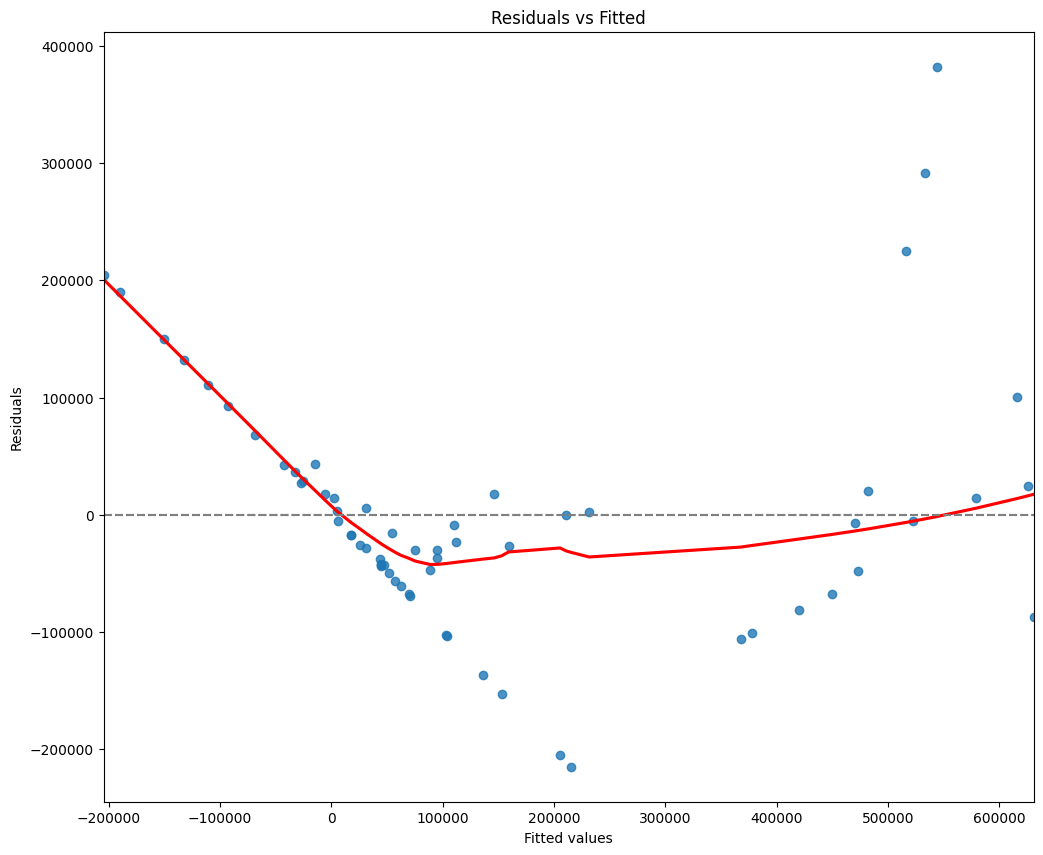

In [ ]:

sns.residplot(x=ols_model.fittedvalues, y=ols_model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# **(2b). Normal Q-Q plot**

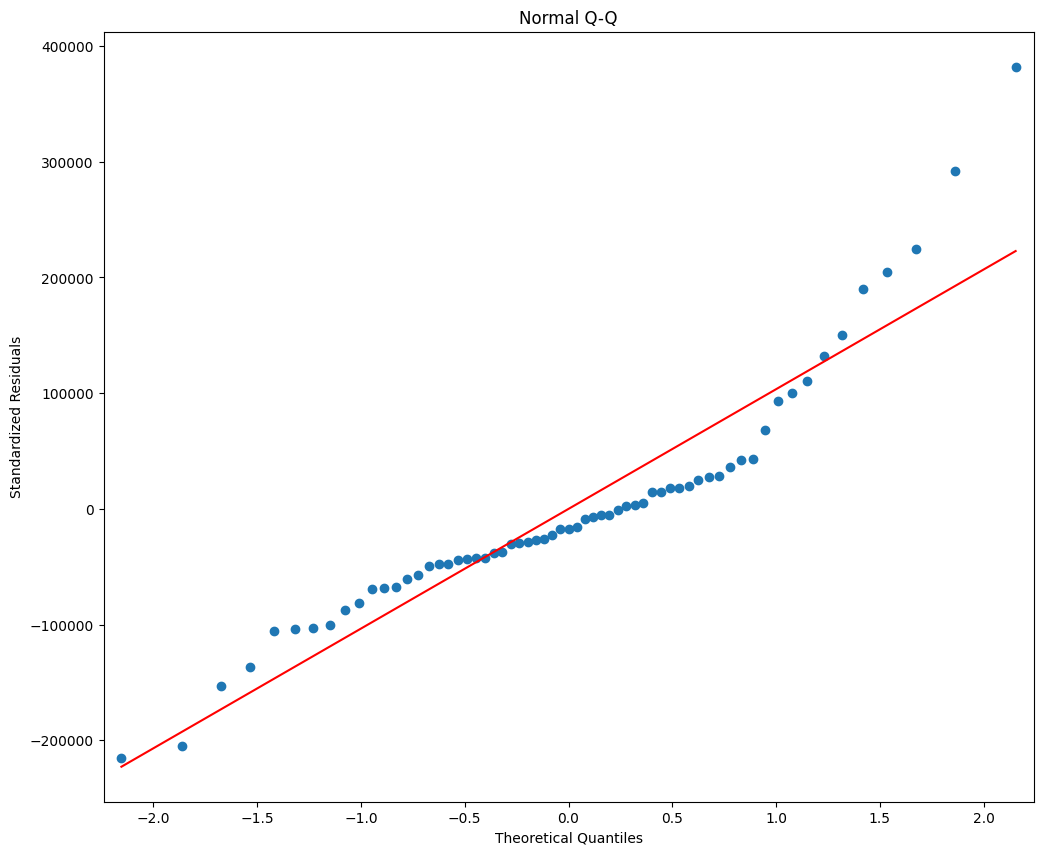

In [ ]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

# **(2c) Scale-Location plot**

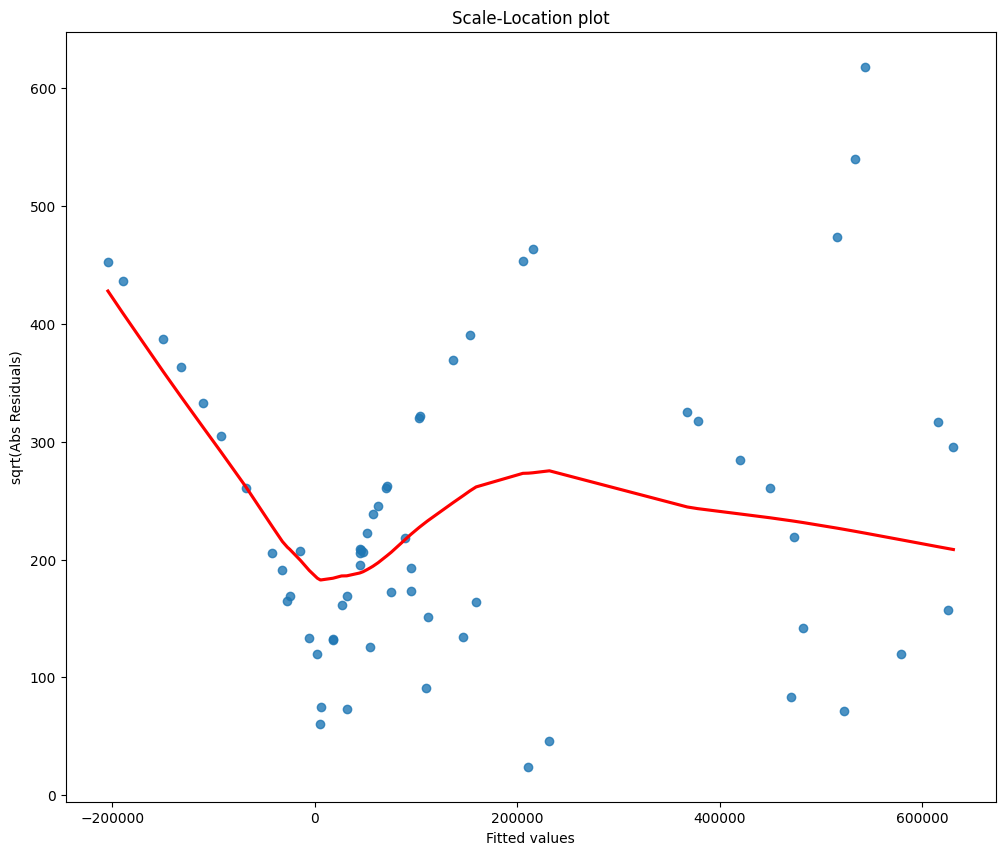

In [ ]:
sns.regplot(x=ols_model.fittedvalues, y=np.sqrt(np.abs(ols_model.resid)), lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location plot')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(Abs Residuals)')
plt.show()

# **(2d) Residuals vs Leverage plot with Cook's distance lines**

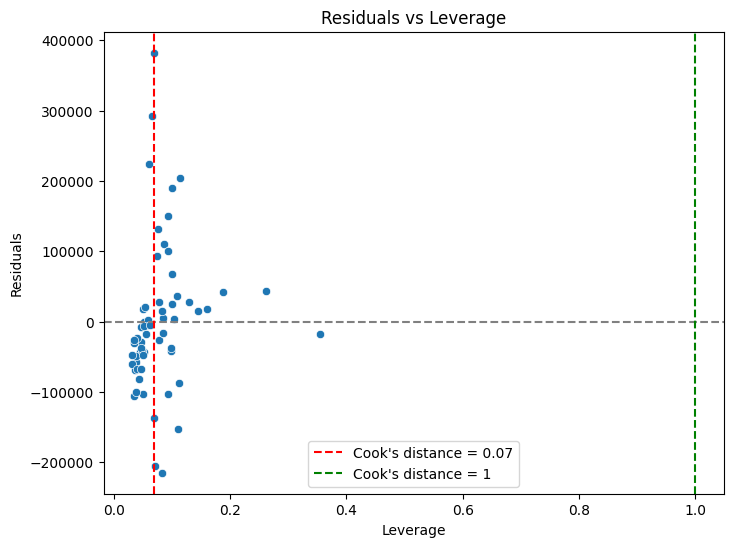

In [ ]:
influence = ols_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Residuals vs Leverage plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=leverage, y=ols_model.resid)
plt.axhline(y=0, color='grey', linestyle='--')

# Add Cook's distance lines
cooks_d = influence.cooks_distance[0]
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Residuals')

# Add Cook's distance lines for 4/(n-p-1) and 1
n = len(ols_model.resid)
p = len(ols_model.params) - 1  # exclude intercept
cook_4_n_p = 4 / (n - p - 1)
plt.axvline(x=cook_4_n_p, color='red', linestyle='--', label=f"Cook's distance = {cook_4_n_p:.2f}")
plt.axvline(x=1, color='green', linestyle='--', label="Cook's distance = 1")
plt.legend()
plt.show()

# (3) **absolute value of the residual**

In [ ]:
abs_residuals = np.abs(ols_model.resid)
print("\n--- Absolute Value of OLS Residuals ---")
print(abs_residuals.head())
print(f"\nMean of Absolute Residuals: {abs_residuals.mean():.4f}")
print(f"Max of Absolute Residuals: {abs_residuals.max():.4f}")


--- Absolute Value of OLS Residuals ---
0    204575.967677
1    190162.500249
2    149911.944525
3    110558.118926
4    132196.109112
dtype: float64

Mean of Absolute Residuals: 71285.8957
Max of Absolute Residuals: 382133.7552


# (4) **Iterative Relatively Least Squares (IRLS) using Huber weights and the Bisquare weighting function**

In [ ]:
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.robust import norms

# Define the dependent and independent variables for RLM
y = df['Gdp']
X = df[['Infl', 'Lexp_F', 'Lexp_M', 'Lexp_T']]
X = sm.add_constant(X) # Add an intercept to the independent variables

print("\n--- IRLS with Huber Weights ---")
# Fit RLM with HuberT norm (Huber weights)
huber_rlm_model = RLM(y, X, M=norms.HuberT()).fit()
print(huber_rlm_model.summary())

print("\n--- IRLS with Bisquare Weighting Function ---")
# Fit RLM with TukeyBiweight norm (Bisquare weighting function)
bisquare_rlm_model = RLM(y, X, M=norms.TukeyBiweight()).fit()
print(bisquare_rlm_model.summary())


--- IRLS with Huber Weights ---
                    Robust linear Model Regression Results                    
Dep. Variable:                    Gdp   No. Observations:                   63
Model:                            RLM   Df Residuals:                       58
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 13 Jun 2025                                         
Time:                        10:48:10                                         
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.588e+

# (5) **Comparing  results in (3 and 4) with (1) above, and draw your conclusion.**

```


Residuals vs Fitted Plot: This plot shows the residuals on the y-axis and the fitted values on the x-axis. Ideally, residuals should be randomly scattered around the horizontal line at 0, indicating a linear relationship and homoscedasticity (constant variance of errors).

Normal Q-Q Plot: This plot compares the distribution of residuals to a normal distribution. If residuals are normally distributed, the points should fall approximately along the $45$-degree line. Deviations from this line suggest non-normality of residuals.

Scale-Location Plot (Spread-Location Plot): This plot shows the square root of the standardized residuals versus the fitted values. It is used to check the assumption of homoscedasticity. A horizontal line with randomly spread points indicates constant variance.

Residuals vs Leverage Plot: This plot helps identify influential observations, which are points that have a strong impact on the regression line. Points with high leverage (far from the center of the independent variables) and large residuals are considered influential. Cook's distance contours are often used to identify such points; points outside these contours are potentially influential.

These plots are crucial for assessing the assumptions of linear regression and identifying potential issues like non-linearity, heteroscedasticity, non-normal residuals, or influential observations.

```
